## Étape 5 : Interprétation et Visualisation

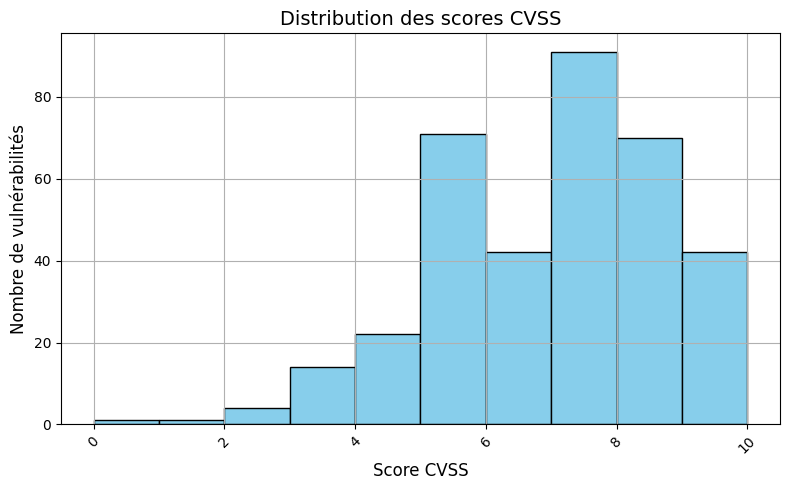

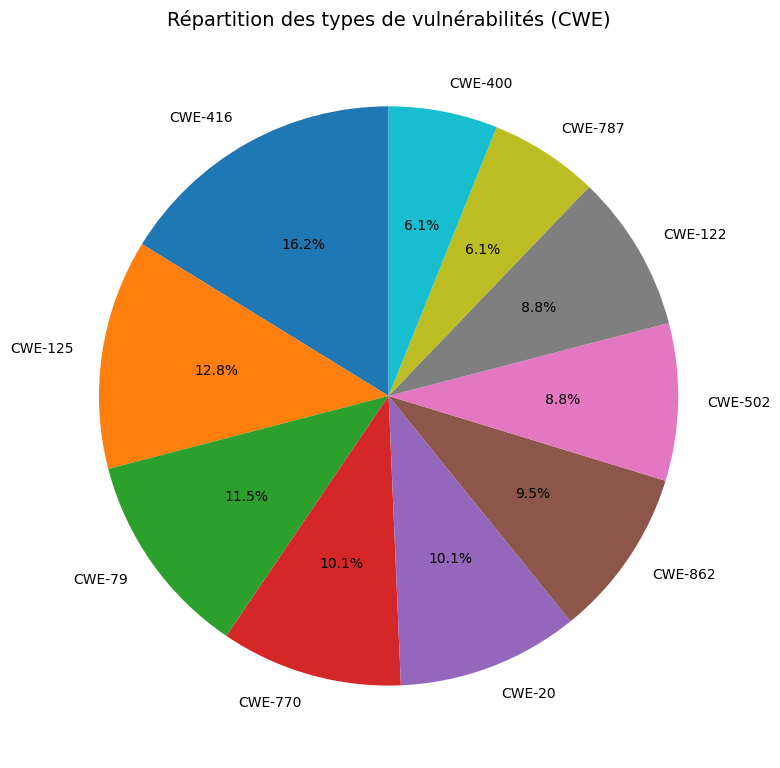

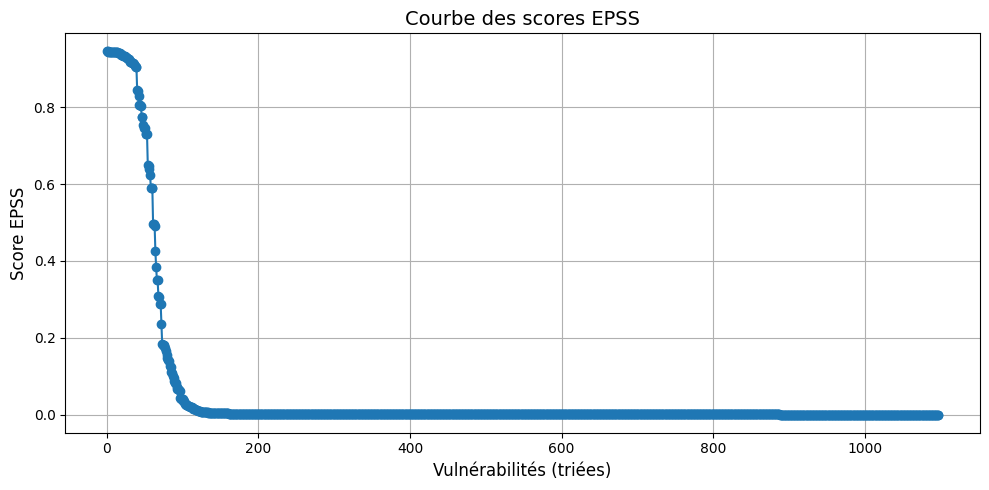

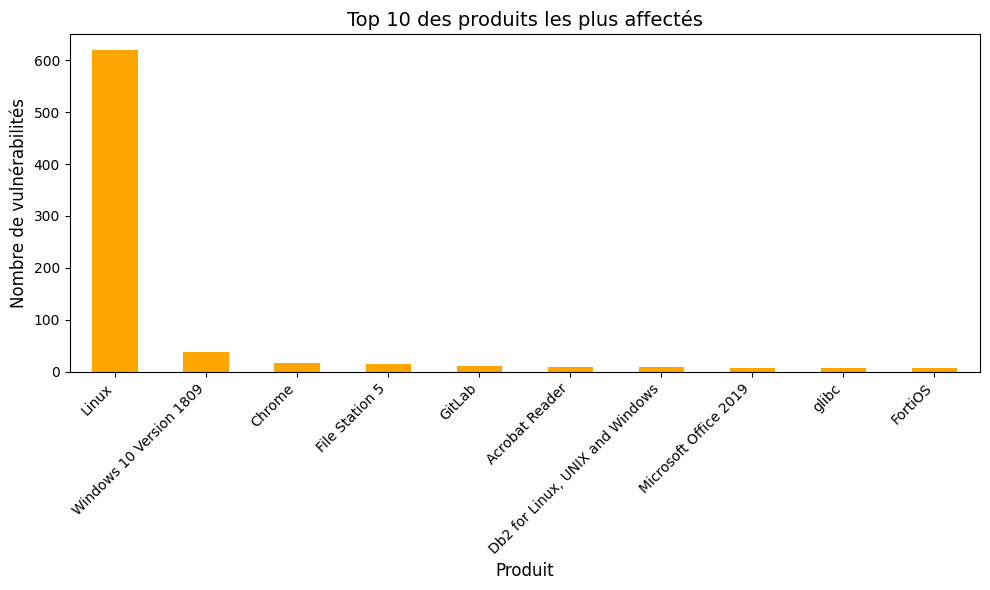

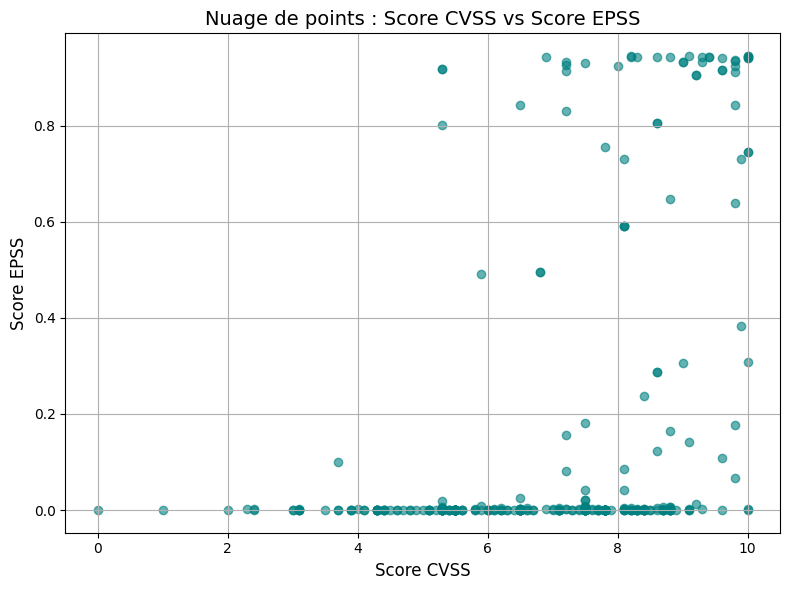

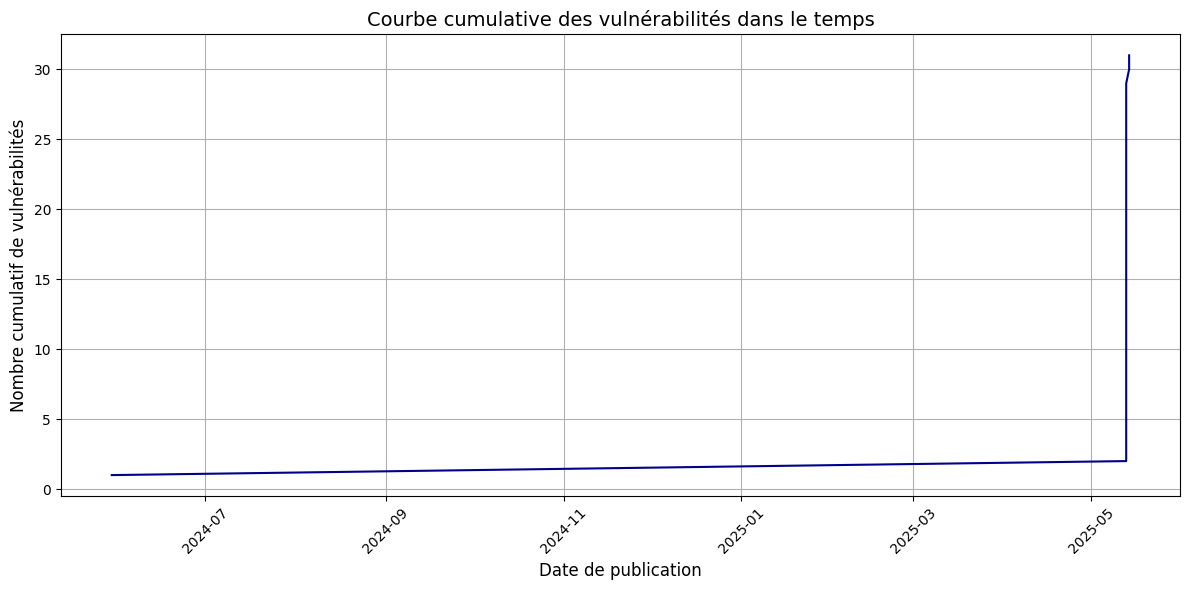

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Charger le fichier CSV
df = pd.read_csv("data.csv", sep=';')

# 1. Histogramme des scores CVSS
plt.figure(figsize=(8,5))
df['Score CVSS'].dropna().hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution des scores CVSS", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Diagramme circulaire des types de vulnérabilités (CWE)
cwe_counts = df['Type CWE'].value_counts().head(10)
plt.figure(figsize=(8,8))
cwe_counts.index = cwe_counts.index.astype(str)
cwe_counts.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Courbe des scores EPSS
df_sorted = df.sort_values("Score EPSS", ascending=False)
plt.figure(figsize=(10,5))
plt.plot(df_sorted['Score EPSS'].dropna().values, marker='o')
plt.title("Courbe des scores EPSS", fontsize=14)
plt.xlabel("Vulnérabilités (triées)", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Classement des produits les plus affectés
produit_counts = df['Produit'].value_counts().head(10)
plt.figure(figsize=(10,6))
produit_counts.plot(kind='bar', color='orange')
plt.title("Top 10 des produits les plus affectés", fontsize=14)
plt.xlabel("Produit", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 5. Nuage de points Score CVSS vs Score EPSS
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')
df_clean = df.dropna(subset=['Score CVSS', 'Score EPSS'])

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Score CVSS'], df_clean['Score EPSS'], alpha=0.6, color='teal')
plt.title("Nuage de points : Score CVSS vs Score EPSS", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Score EPSS", fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 6. Courbe cumulative des vulnérabilités dans le temps
df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df_clean = df.dropna(subset=['Date de publication']).copy()
df_clean['Date de publication'] = df_clean['Date de publication'].dt.tz_localize(None)
df_sorted = df_clean.sort_values('Date de publication').copy()
df_sorted['Cumul'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(12,6))
plt.plot(df_sorted['Date de publication'], df_sorted['Cumul'], color='darkblue')
plt.title("Courbe cumulative des vulnérabilités dans le temps", fontsize=14)
plt.xlabel("Date de publication", fontsize=12)
plt.ylabel("Nombre cumulatif de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


## data_complet contenant des données anciennement manquantes maintenant remplies

In [3]:
df = pd.read_csv("data_complet.csv", sep=';')
df


,ID du bulletin (ANSSI),Titre du bulletin (ANSSI),Type de bulletin,Date de publication,Identifiant CVE,Score CVSS,Base Severity,Type CWE,Score EPSS,Lien du bulletin (ANSSI),Description,Éditeur/Vendor,Produit,Versions affectées
0,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-4573,4.1,MEDIUM,CWE-90,0.00028,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.7.x <= 10.7.1, 10.6.x <...",Mattermost,Mattermost,"10.7.0, 10.6.0, 10.5.0, 9.11.0"
1,CERTFR-2025-AVI-0392,Multiples vulnérabilités dans Mattermost Serve...,avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-4128,3.1,LOW,CWE-863,0.00023,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"Mattermost versions 10.5.x <= 10.5.4, 9.11.x <...",Mattermost,Mattermost,"10.5.0, 9.11.0"
2,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-30009,6.1,MEDIUM,CWE-79,0.00116,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,he Live Auction Cockpit in SAP Supplier Relati...,SAP_SE,SAP Supplier Relationship Management (Live Auc...,SRM_SERVER 7.14
3,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-43002,4.3,MEDIUM,CWE-472,0.00035,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP S4CORE OData meta-data property allows an ...,SAP_SE,SAP S4/HANA (OData meta-data property),"S4CORE 102, 103, 104, 105, 106"
4,CERTFR-2025-AVI-0396,Multiples vulnérabilités dans les produits SAP...,avis,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-0061,8.7,HIGH,CWE-497,0.00049,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SAP BusinessObjects Business Intelligence Plat...,SAP_SE,SAP BusinessObjects Business Intelligence Plat...,"ENTERPRISE 420, 430, 2025"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,CERTFR-2025-ALE-005,Vulnérabilité dans SAP NetWeaver (28 avril 2025),alerte,"Mon, 28 Apr 2025 00:00:00 +0000",CVE-2025-31324,10.0,CRITICAL,CWE-434,0.74446,https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,SAP NetWeaver Visual Composer Metadata Uploade...,SAP_SE,SAP NetWeaver (Visual Composer development ser...,VCFRAMEWORK 7.50
1140,CERTFR-2025-ALE-006,Vulnérabilité dans les produits Fortinet (13 m...,alerte,"Tue, 13 May 2025 00:00:00 +0000",CVE-2025-32756,9.6,CRITICAL,CWE-121,0.10736,https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,A stack-based buffer overflow vulnerability [C...,Fortinet,FortiVoice,"7.2.0, 7.0.0, 6.4.0"
1141,CERTFR-2025-ALE-007,Multiples vulnérabilités dans Ivanti Endpoint ...,alerte,"Wed, 14 May 2025 00:00:00 +0000",CVE-2025-4428,7.2,HIGH,CWE-94,0.15539,https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,Remote Code Execution in API component in Ivan...,Ivanti,Endpoint Manager Mobile,NaN
1142,CERTFR-2025-ALE-007,Multiples vulnérabilités dans Ivanti Endpoint ...,alerte,"Wed, 14 May 2025 00:00:00 +0000",CVE-2025-4427,5.3,MEDIUM,CWE-288,0.80199,https://www.cert.ssi.gouv.fr/alerte/CERTFR-202...,An authentication bypass in the API component ...,Ivanti,Endpoint Manager Mobile,NaN


## Visualisation données complètes

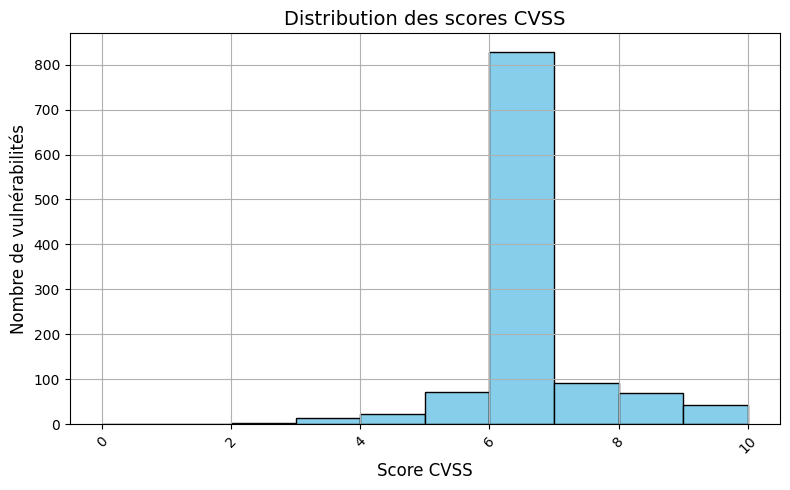

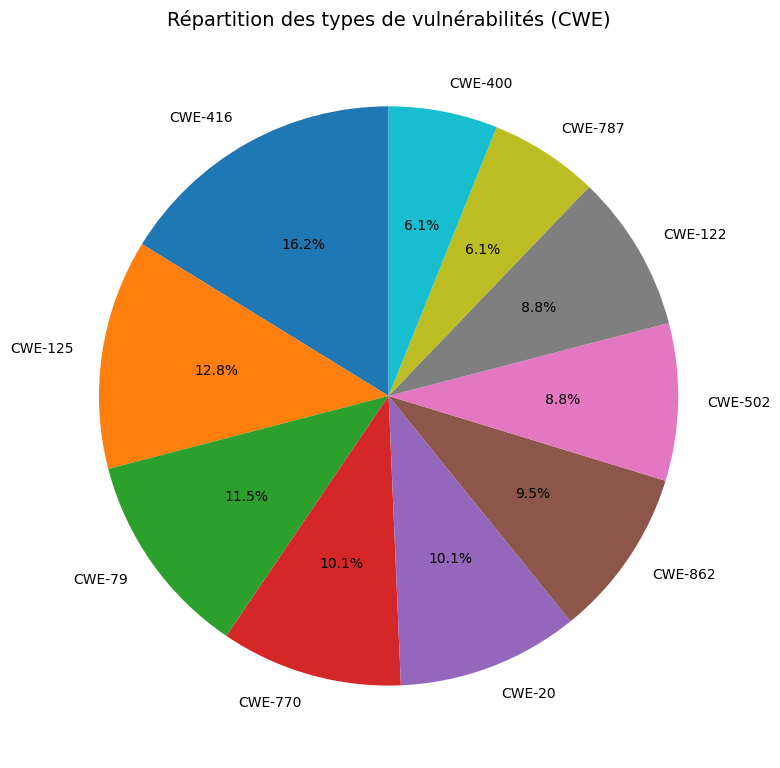

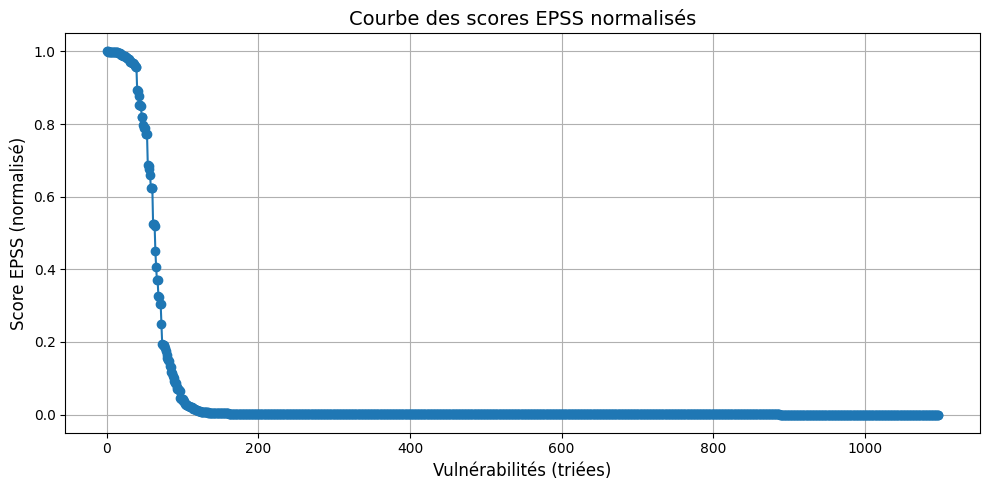

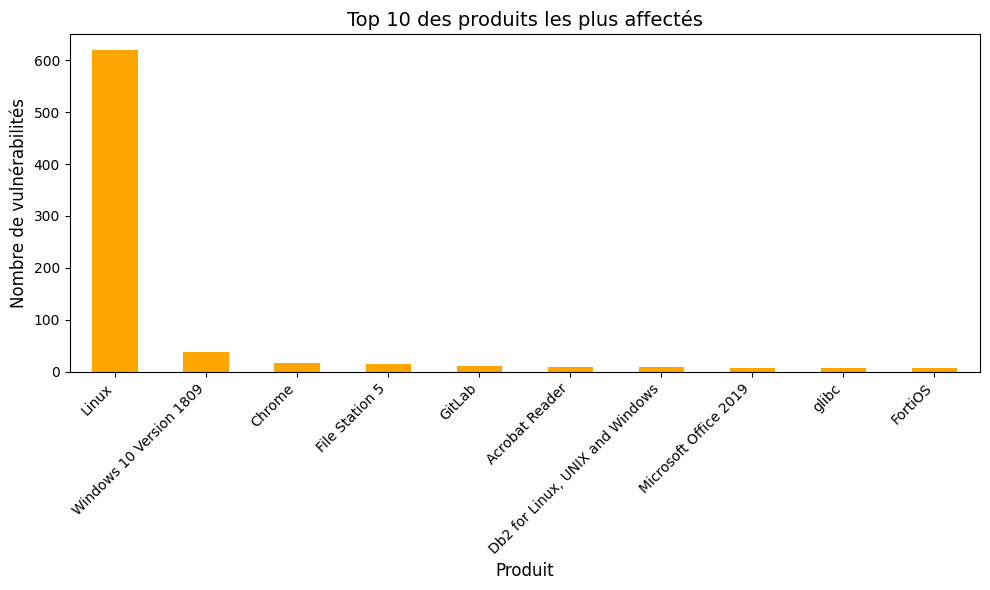

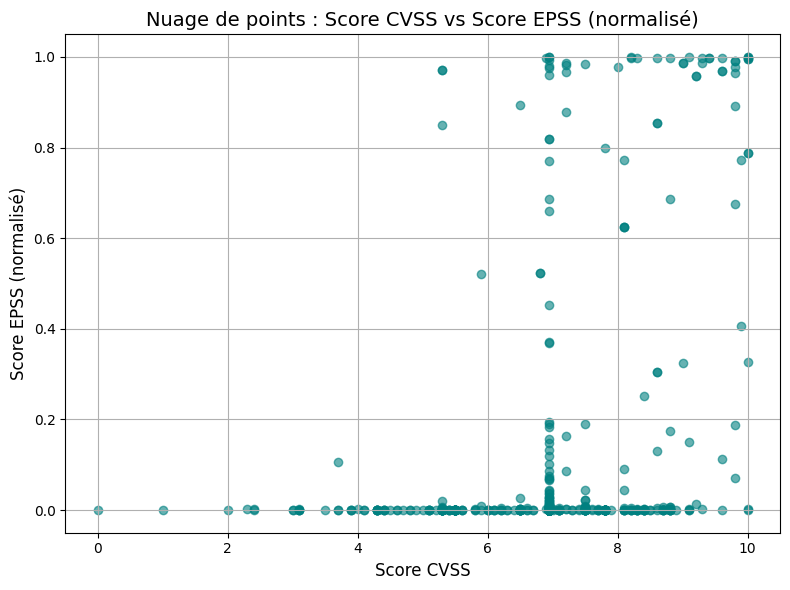

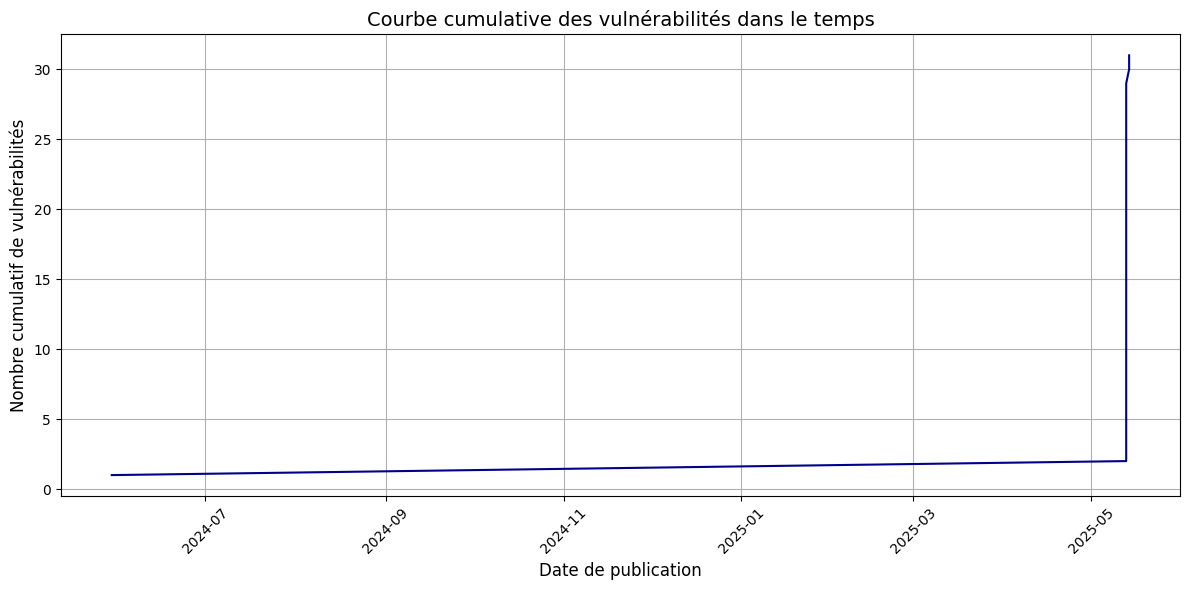

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("data_complet.csv", sep=';')

# Conversion des champs numériques
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')

# Création du score EPSS normalisé si pas déjà dans le fichier
if 'EPSS normalisé' not in df.columns:
    epss_min = df['Score EPSS'].min()
    epss_max = df['Score EPSS'].max()
    df['EPSS normalisé'] = (df['Score EPSS'] - epss_min) / (epss_max - epss_min)

# 1. Histogramme des scores CVSS
plt.figure(figsize=(8,5))
df['Score CVSS'].dropna().hist(bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution des scores CVSS", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Diagramme circulaire des types de vulnérabilités (CWE)
cwe_counts = df['Type CWE'].value_counts().head(10)
plt.figure(figsize=(8,8))
cwe_counts.index = cwe_counts.index.astype(str)
cwe_counts.plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title("Répartition des types de vulnérabilités (CWE)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Courbe des scores EPSS normalisés
df_sorted = df.sort_values("EPSS normalisé", ascending=False)
plt.figure(figsize=(10,5))
plt.plot(df_sorted['EPSS normalisé'].dropna().values, marker='o')
plt.title("Courbe des scores EPSS normalisés", fontsize=14)
plt.xlabel("Vulnérabilités (triées)", fontsize=12)
plt.ylabel("Score EPSS (normalisé)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Classement des produits les plus affectés
produit_counts = df['Produit'].value_counts().head(10)
plt.figure(figsize=(10,6))
produit_counts.plot(kind='bar', color='orange')
plt.title("Top 10 des produits les plus affectés", fontsize=14)
plt.xlabel("Produit", fontsize=12)
plt.ylabel("Nombre de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 5. Nuage de points : Score CVSS vs EPSS normalisé
df_clean = df.dropna(subset=['Score CVSS', 'EPSS normalisé'])
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Score CVSS'], df_clean['EPSS normalisé'], alpha=0.6, color='teal')
plt.title("Nuage de points : Score CVSS vs Score EPSS (normalisé)", fontsize=14)
plt.xlabel("Score CVSS", fontsize=12)
plt.ylabel("Score EPSS (normalisé)", fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 6. Courbe cumulative des vulnérabilités dans le temps
df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df_clean_date = df.dropna(subset=['Date de publication']).copy()
df_clean_date['Date de publication'] = df_clean_date['Date de publication'].dt.tz_localize(None)
df_sorted_date = df_clean_date.sort_values('Date de publication').copy()
df_sorted_date['Cumul'] = range(1, len(df_sorted_date) + 1)

plt.figure(figsize=(12,6))
plt.plot(df_sorted_date['Date de publication'], df_sorted_date['Cumul'], color='darkblue')
plt.title("Courbe cumulative des vulnérabilités dans le temps", fontsize=14)
plt.xlabel("Date de publication", fontsize=12)
plt.ylabel("Nombre cumulatif de vulnérabilités", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()




## Étape 6 : Model Machine Learning

### ML supervisé — Prédiction du Score CVSS (régression)

Mean Squared Error (MSE) : 0.4358
R² score : 0.8232


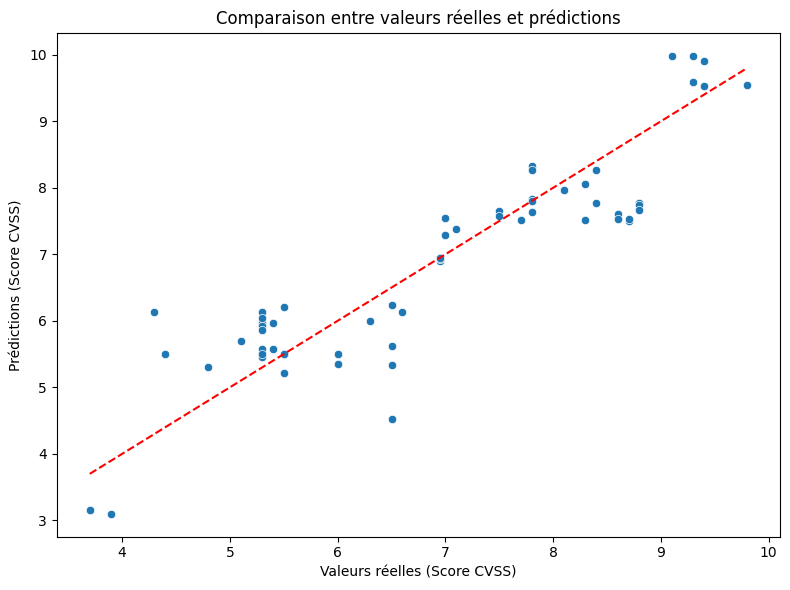

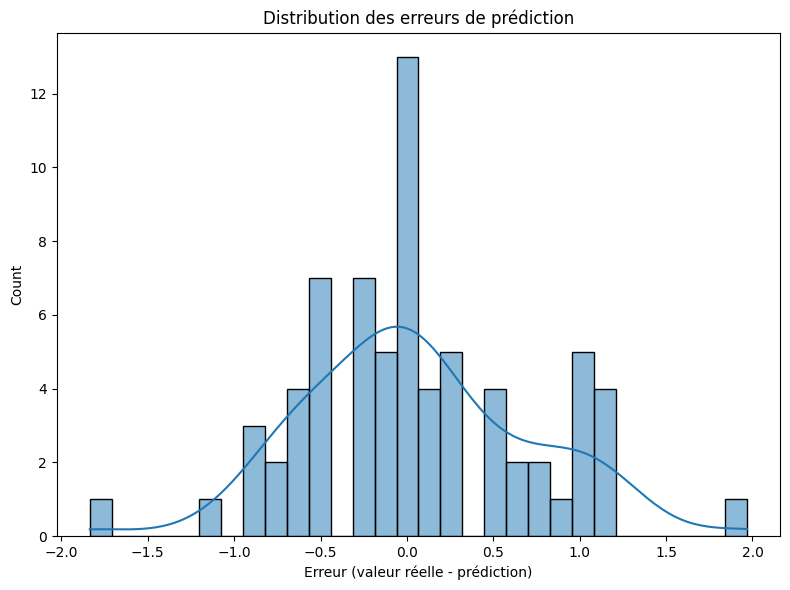

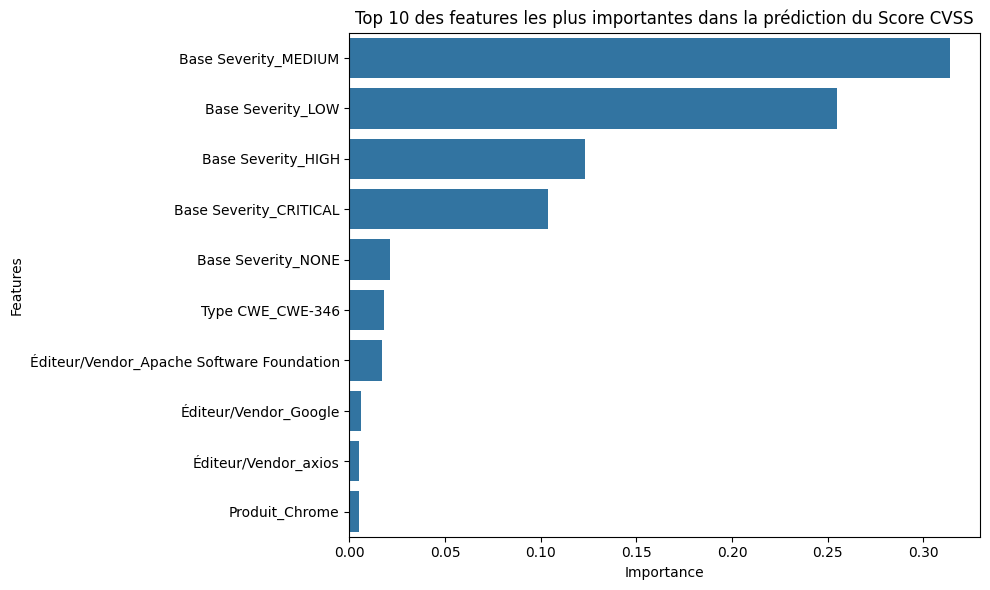

Nombre d'échantillons utilisés : 297


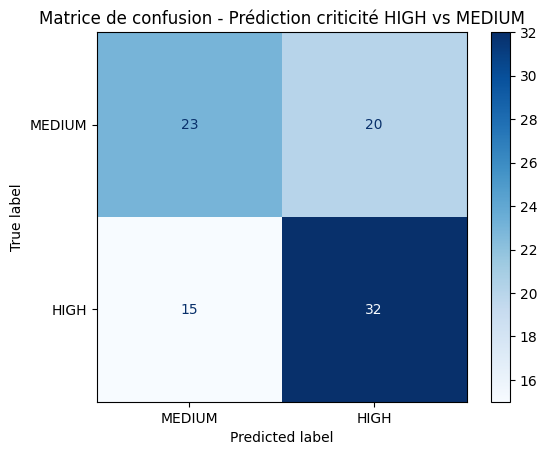

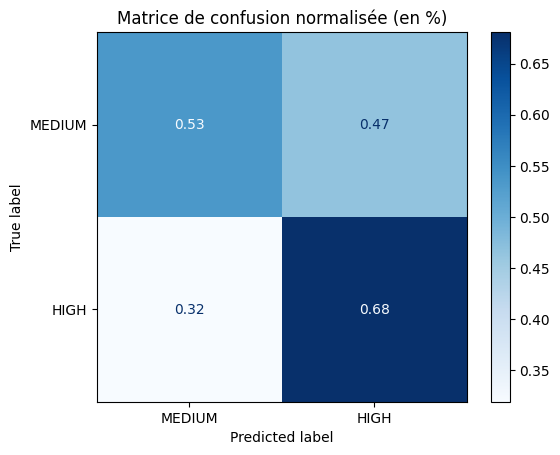

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Chargement du fichier CSV
df = pd.read_csv("data_complet.csv", sep=";")

# Conversion des champs numériques
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'], errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'], errors='coerce')

# Création de la colonne EPSS normalisé si nécessaire
if 'EPSS normalisé' not in df.columns:
    epss_min = df['Score EPSS'].min()
    epss_max = df['Score EPSS'].max()
    df['EPSS normalisé'] = (df['Score EPSS'] - epss_min) / (epss_max - epss_min)

# --- Préparation du modèle ---

# Nouvelle target
target = 'Score CVSS'

# Colonnes explicatives (on enlève 'Score CVSS' car c’est la target maintenant)
features = ['Type CWE', 'Base Severity', 'Éditeur/Vendor', 'Produit']

# Supprimer les lignes sans target ni features
df = df.dropna(subset=features + [target])

# Séparer X et y
X = df[features]
y = df[target]

# Colonnes catégorielles (ici, toutes les features sont catégorielles)
categorical_cols = features
numerical_cols = []  # plus de colonnes numériques dans les features

# Prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Modèle
model = RandomForestRegressor(random_state=42)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"R² score : {r2:.4f}")

# --- Visualisation ---

# 1. Valeurs réelles vs prédictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valeurs réelles (Score CVSS)")
plt.ylabel("Prédictions (Score CVSS)")
plt.title("Comparaison entre valeurs réelles et prédictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# 2. Distribution des erreurs
errors = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Erreur (valeur réelle - prédiction)")
plt.title("Distribution des erreurs de prédiction")
plt.tight_layout()
plt.show()

# 3. Importance des features
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(categorical_cols)
importances = pipeline.named_steps['regressor'].feature_importances_

# Top N
top_n = 10
indices = importances.argsort()[::-1][:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title(f"Top {top_n} des features les plus importantes dans la prédiction du Score CVSS")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Préparation des données
df_crit = df[df['Base Severity'].isin(['HIGH', 'MEDIUM'])].dropna(subset=['Base Severity', 'Score EPSS'])
X = df_crit[['Score EPSS']]  # Ajouter plus de features si possible
y = LabelEncoder().fit_transform(df_crit['Base Severity'])
print("Nombre d'échantillons utilisés :", df_crit.shape[0])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['MEDIUM', 'HIGH'])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Prédiction criticité HIGH vs MEDIUM")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalisation par ligne (par classe réelle)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Affichage
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['MEDIUM', 'HIGH'])
disp.plot(cmap='Blues', values_format=".2f")
plt.title("Matrice de confusion normalisée (en %)")
plt.show()




### ML non supervisé — Clustering des vulnérabilités

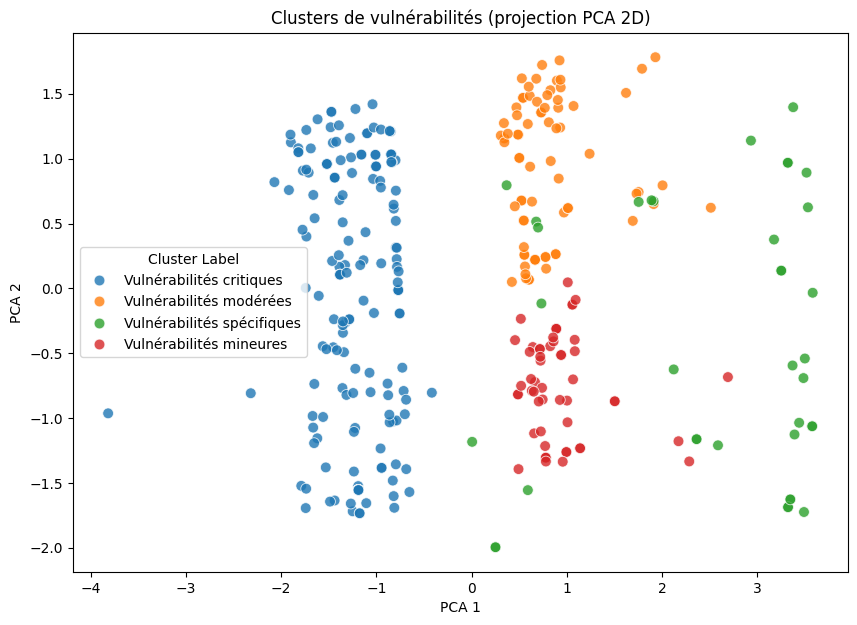

Taille des clusters :
cluster_label
Vulnérabilités critiques      173
Vulnérabilités modérées        84
Vulnérabilités mineures        57
Vulnérabilités spécifiques     37
Name: count, dtype: int64

Statistiques par cluster (moyennes) :
                            Score CVSS  Score EPSS  Base Severity Enc  \
cluster_label                                                           
Vulnérabilités critiques      5.500289    0.003236           2.895954   
Vulnérabilités mineures       8.080702    0.032208           0.947368   
Vulnérabilités modérées       8.079762    0.012537           0.892857   
Vulnérabilités spécifiques    8.555405    0.886522           0.837838   

                            Type CWE Enc  
cluster_label                             
Vulnérabilités critiques       55.751445  
Vulnérabilités mineures        22.421053  
Vulnérabilités modérées        75.940476  
Vulnérabilités spécifiques     48.405405  


C:\Users\tibob\AppData\Local\Temp\ipykernel_15628\3948591213.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_label', data=df_unsup, palette='tab10')


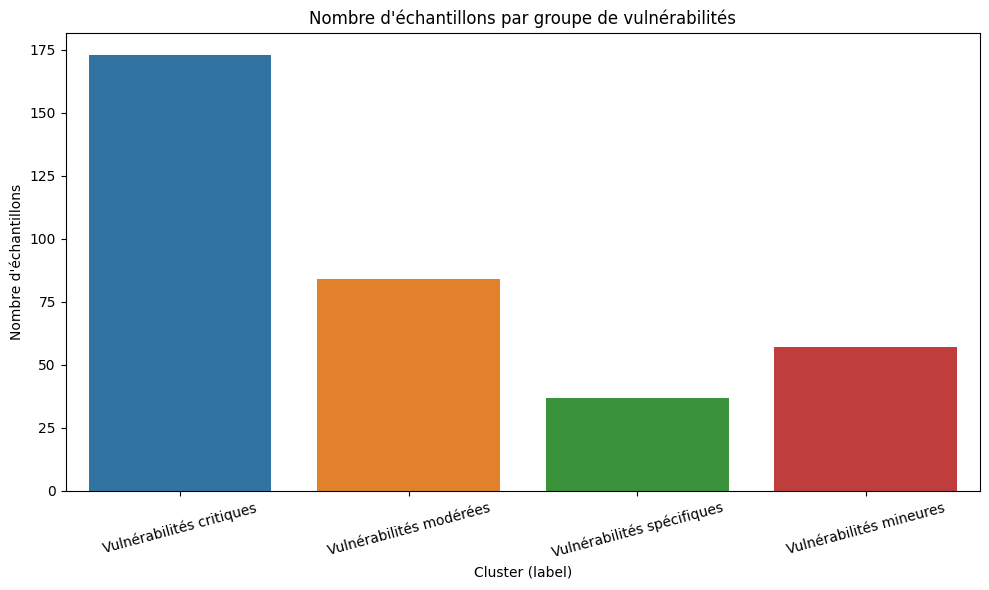

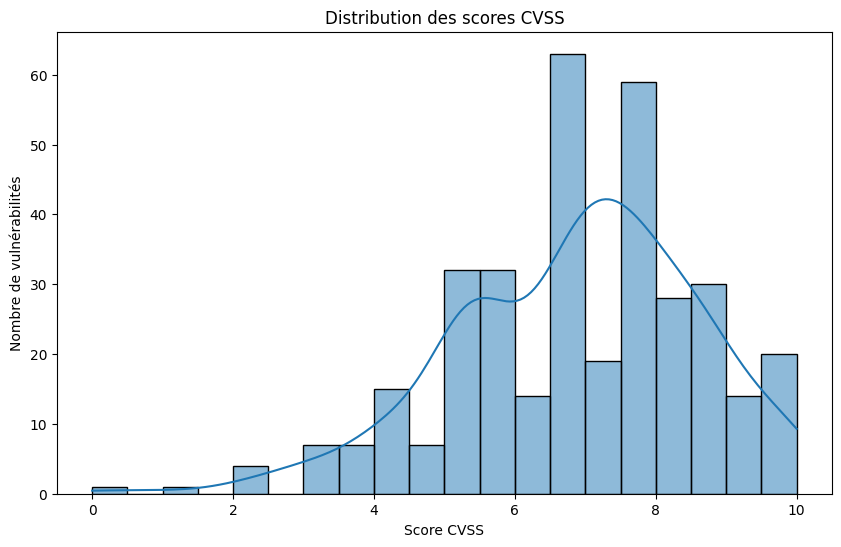

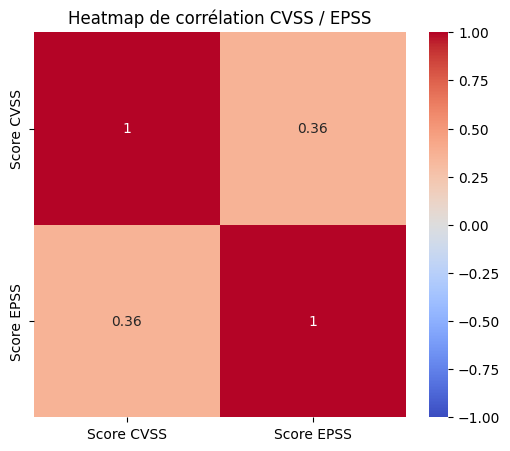

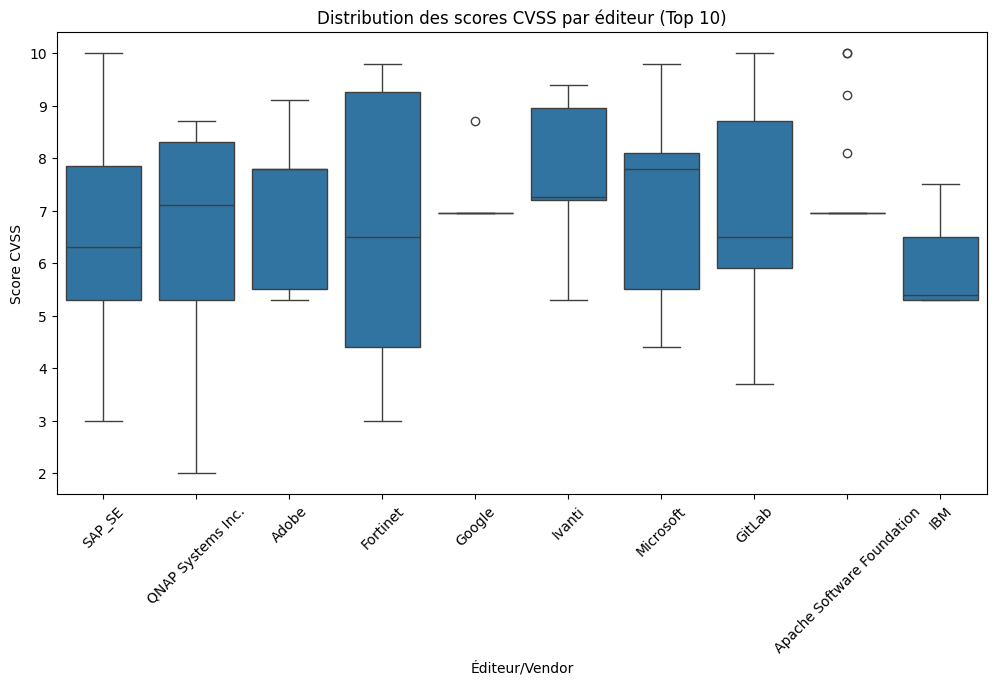

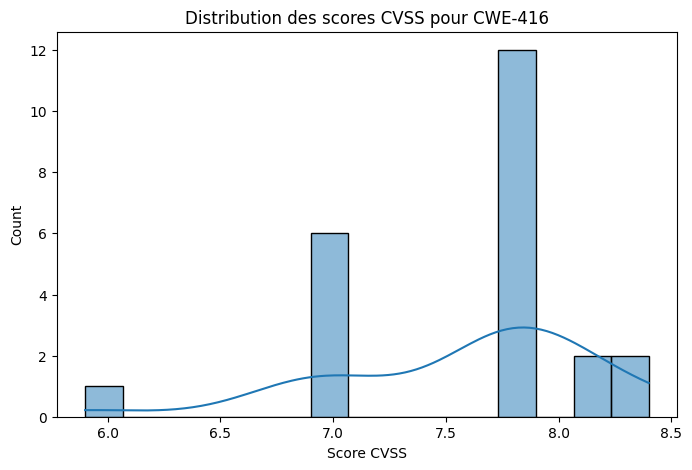

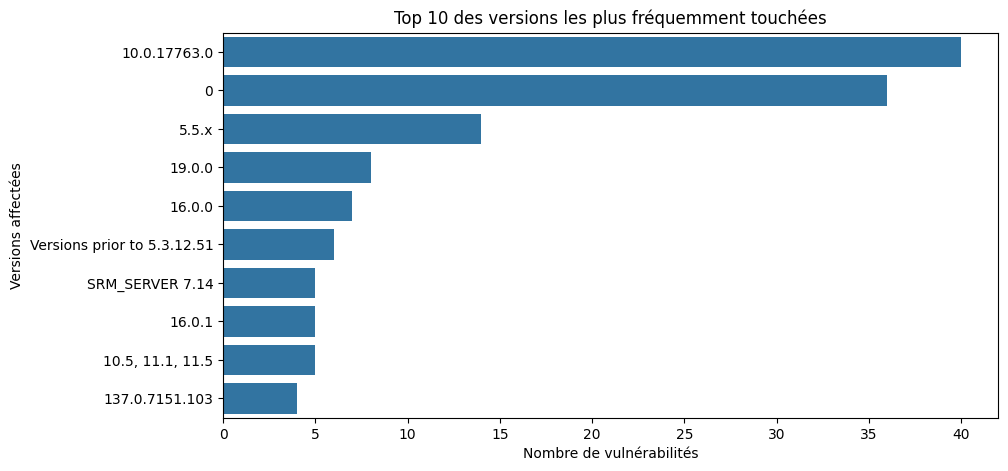

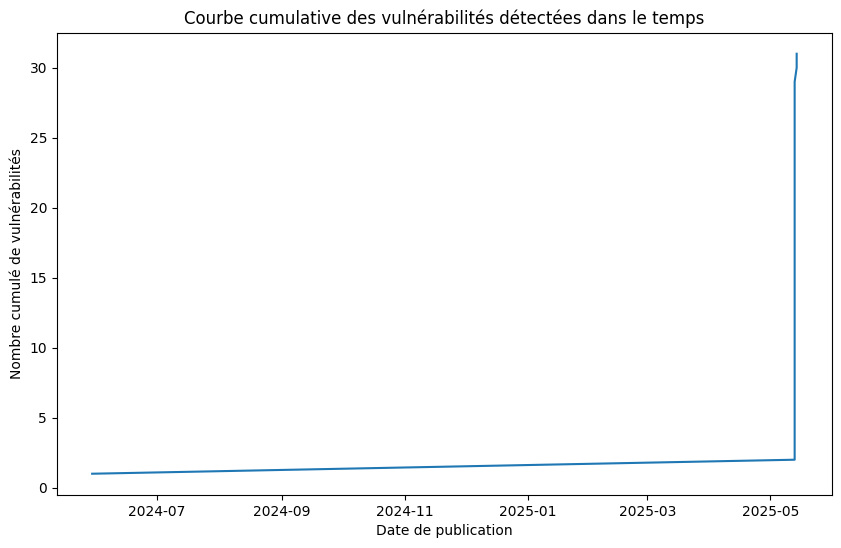

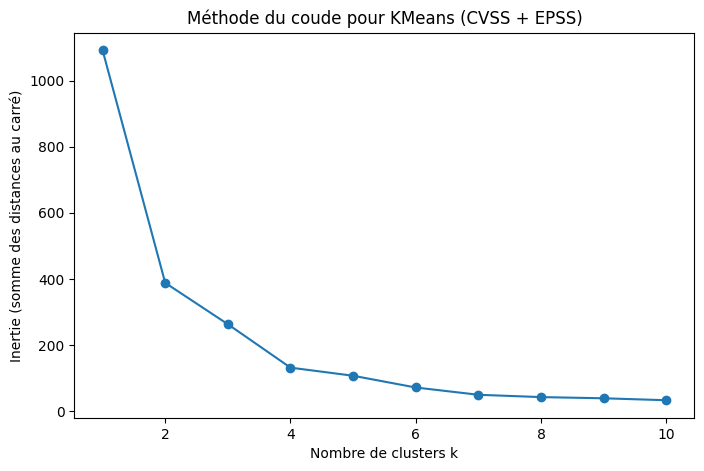

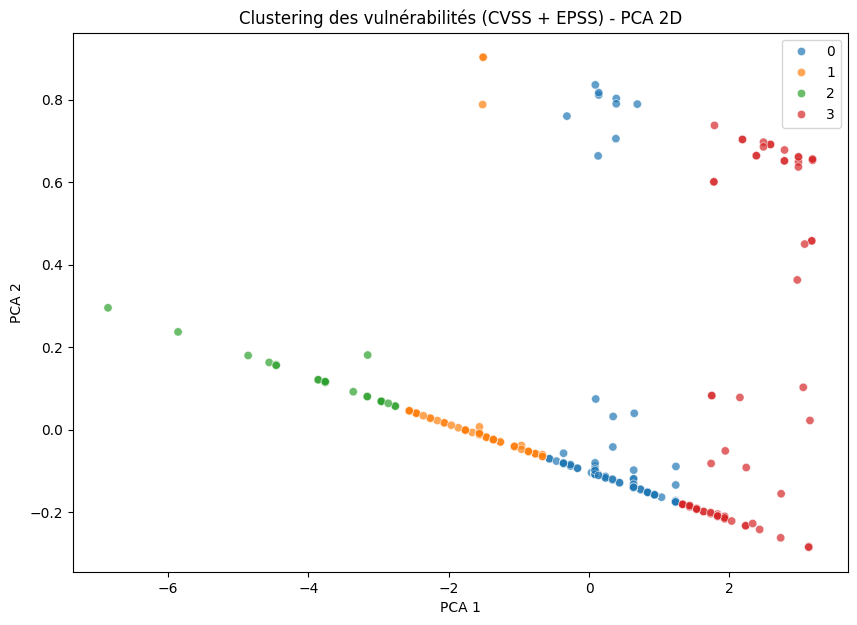

Variance expliquée par chaque composante :
Composante 1: 0.979
Composante 2: 0.021


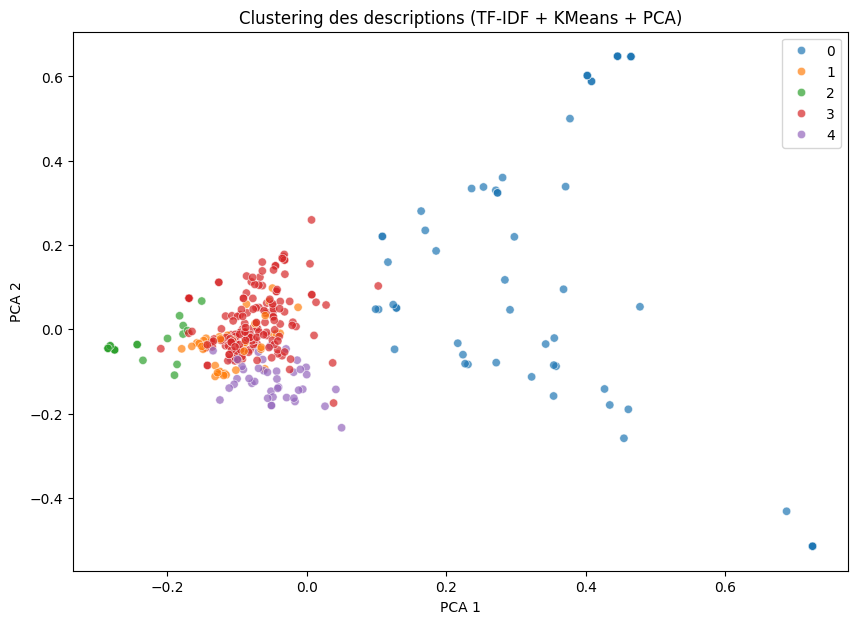

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_unsup = ['Score CVSS', 'Score EPSS', 'Base Severity', 'Type CWE']

df_unsup = df.dropna(subset=features_unsup).copy()

# Encodage catégoriel avec .loc pour éviter warning
df_unsup.loc[:, 'Base Severity Enc'] = LabelEncoder().fit_transform(df_unsup['Base Severity'])
df_unsup.loc[:, 'Type CWE Enc'] = LabelEncoder().fit_transform(df_unsup['Type CWE'])

X_unsup = df_unsup[['Score CVSS', 'Score EPSS', 'Base Severity Enc', 'Type CWE Enc']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_unsup['cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cluster_labels = {
    0: "Vulnérabilités modérées",
    1: "Vulnérabilités mineures",
    2: "Vulnérabilités critiques",
    3: "Vulnérabilités spécifiques"
}

label_names = df_unsup['cluster'].map(cluster_labels)

plt.figure(figsize=(10, 7))
palette = sns.color_palette('tab10', len(cluster_labels))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=label_names, palette=palette, s=60, alpha=0.8)
plt.title('Clusters de vulnérabilités (projection PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster Label')
plt.show()

df_unsup['cluster_label'] = label_names

print("Taille des clusters :")
print(df_unsup['cluster_label'].value_counts())

print("\nStatistiques par cluster (moyennes) :")
print(df_unsup.groupby('cluster_label')[['Score CVSS', 'Score EPSS', 'Base Severity Enc', 'Type CWE Enc']].mean())

plt.figure(figsize=(10,6))
sns.countplot(x='cluster_label', hue='cluster_label', data=df_unsup, palette='tab10', legend=False)
plt.title("Nombre d'échantillons par groupe de vulnérabilités")
plt.xlabel("Cluster (label)")
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df['Score CVSS'].dropna(), bins=20, kde=True)
plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(df[['Score CVSS', 'Score EPSS']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap de corrélation CVSS / EPSS")
plt.show()

plt.figure(figsize=(12,6))
top_vendors = df['Éditeur/Vendor'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Éditeur/Vendor'].isin(top_vendors)], x='Éditeur/Vendor', y='Score CVSS')
plt.title("Distribution des scores CVSS par éditeur (Top 10)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df[df['Type CWE'] == 'CWE-416']['Score CVSS'].dropna(), bins=15, kde=True)
plt.title("Distribution des scores CVSS pour CWE-416")
plt.xlabel("Score CVSS")
plt.show()

top_versions = df['Versions affectées'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_versions.values, y=top_versions.index)
plt.title("Top 10 des versions les plus fréquemment touchées")
plt.xlabel("Nombre de vulnérabilités")
plt.ylabel("Versions affectées")
plt.show()

df['Date de publication'] = pd.to_datetime(df['Date de publication'], errors='coerce')
df_sorted = df.dropna(subset=['Date de publication']).sort_values('Date de publication')
df_sorted['cumulative_count'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(10,6))
plt.plot(df_sorted['Date de publication'], df_sorted['cumulative_count'])
plt.title("Courbe cumulative des vulnérabilités détectées dans le temps")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulé de vulnérabilités")
plt.show()


X_numeric = df[['Score CVSS', 'Score EPSS']].dropna()

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_numeric)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude pour KMeans (CVSS + EPSS)")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie (somme des distances au carré)")
plt.show()

k = 4  # choisi en fonction de la méthode du coude
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_numeric)

df['cluster'] = pd.NA
df.loc[X_numeric.index, 'cluster'] = clusters

# Visualisation avec PCA 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='tab10', alpha=0.7)
plt.title("Clustering des vulnérabilités (CVSS + EPSS) - PCA 2D")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

pca_full = PCA(n_components=2)
pca_full.fit(X_numeric)

print("Variance expliquée par chaque composante :")
for i, var in enumerate(pca_full.explained_variance_ratio_):
    print(f"Composante {i+1}: {var:.3f}")

from sklearn.feature_extraction.text import TfidfVectorizer

# Nettoyage simple
df_text = df.dropna(subset=['Description'])
texts = df_text['Description'].values

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# KMeans
k = 5
kmeans_desc = KMeans(n_clusters=k, random_state=42)
clusters_desc = kmeans_desc.fit_predict(X_tfidf)

# PCA pour visualisation
pca_desc = PCA(n_components=2)
X_desc_pca = pca_desc.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_desc_pca[:,0], y=X_desc_pca[:,1], hue=clusters_desc, palette='tab10', alpha=0.7)
plt.title("Clustering des descriptions (TF-IDF + KMeans + PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

